# Writing your own Pass

In the [Transpiler stages](transpiler-stages) topic we went over the default behavior of the transpiler and the various stages that compose a transpilation pipeline.  Qiskit allows you to create custom transpilation workflows using: the `PassManager` and `StagedPassMager` objects, writing your own bespoke transpiler passes, and  Here we will take a more careful look at the `PassManager` and `StagedPassManager` objects to customize which passes are executed at what stage and walk through a few examples.


## DAG Representation


However, before we start it is important to first introduce the internal representation of quantum circuits in Qiskit, the *Directed Acyclic Graph* or **DAG**.  If you want to follow along here, you will need to install the `pydot` library and the `graphivz` library for the DAG plotting functions.  Use the python package manager of your choice (such as `pip` or `conda`) to install `pydot` and your system's native package manager (e.g. `apt`, `brew`, `yum`, `dnf`, etc.) for `graphivz`.


In Qiskit, specifically within the transpilation stages, circuits are represented using a Directed Acyclic Graph (DAG).  In general, a DAG is composed of *vertices* (also known as "nodes") and directed *edges* which connect pairs of vertices in a particular orientation.  This representation is stored using `qiskit.dagcircuit.DAGCircuit` objects which are composed of invididual `DagNode` objects.  The advantage of this representation over a pure list of gates (i.e. a *netlist*) is that the flow of information between operators is explicit, making it easier to make transformation decisions.  

Let's look at a simple example to understand the DAG a bit more by preparing a simple circuit which prepares a bell state and applies an $R_Z$ rotation depending on the outcome of a measurement.

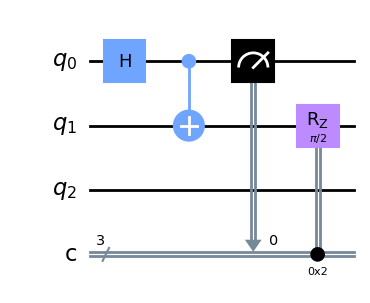

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.dagcircuit import DAGCircuit
import numpy as np
q = QuantumRegister(3, 'q')
c = ClassicalRegister(3, 'c')
circ = QuantumCircuit(q, c)
circ.h(q[0])
circ.cx(q[0], q[1])
circ.measure(q[0], c[0])
circ.rz(np.pi/2, q[1]).c_if(c, 2)
circ.draw(output='mpl')

We can then view this circuit's DAG by using the `qiskit.tools.visualization.dag_drawer()` function.  You'll notice there are three kinds of graph nodes: qubit/clbit nodes (green), operation nodes (blue), and output nodes (red).  Each edge indicates data flow (or dependency) between two nodes.

ValueError: Could not save to JPEG for display

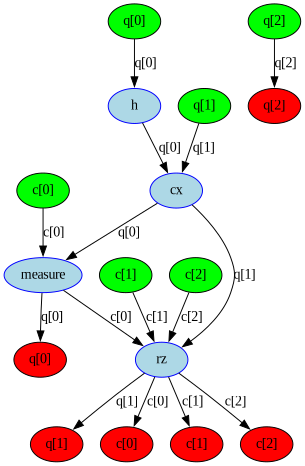

In [3]:
from qiskit.converters import circuit_to_dag
from qiskit.tools.visualization import dag_drawer
dag = circuit_to_dag(circ)
dag_drawer(dag)

## Types of Transpilation Passes

- Go over the differences between an `AnalysisPass` and a `TransformationPass`-



## Creating a custom Mapping pass

[Use this example for content](https://qiskit.org/documentation/tutorials/circuits_advanced/04_transpiler_passes_and_passmanager.html#Implementing-a-BasicMapper-Pass)

[A helpful page on synthesis plugins](https://qiskit.org/documentation/apidoc/transpiler_synthesis_plugins.html)

[The information from this example](https://qiskit.org/documentation/apidoc/synthesis_aqc.html) may also be helpful


[Perhaps information about the multiplexor representation is useful here?](https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html)